# Visualization and customer segmentation using wholesale dataset

The dataset is open-access and can be downloaded from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wholesale+customers). It refers to clients of a wholesale distributor (Portugal) and includes the annual spending in monetary units on diverse product categories. It contains 440 rows corresponding to different customers, and 8 attributes. In addition to the product categories mentioned above, the attributes include the columns 'Channel' (Hotel/Restaurant/Café or Retail, indicated by 1/2) and 'Region' (Lisbon, Oporto or other, indicated by 1/2/3). 

***Import some useful modules:***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Load dataset:***

In [2]:
data_file = "Wholesale_customers_data.csv"

data = pd.read_csv(data_file, sep=',')

***Inspect dataset:***

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


***Add a potentially very important column: total amount spent on all categories***

In [5]:
data['Total'] = data['Fresh'] + data['Milk'] + data['Grocery'] + data['Frozen'] + data['Detergents_Paper'] + data['Delicassen']

***Inspect distribution of values in each columns of the dataframe:***

In [6]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


## Data visualization

***Using matplotlib.pyplot display histograms of columns values:***

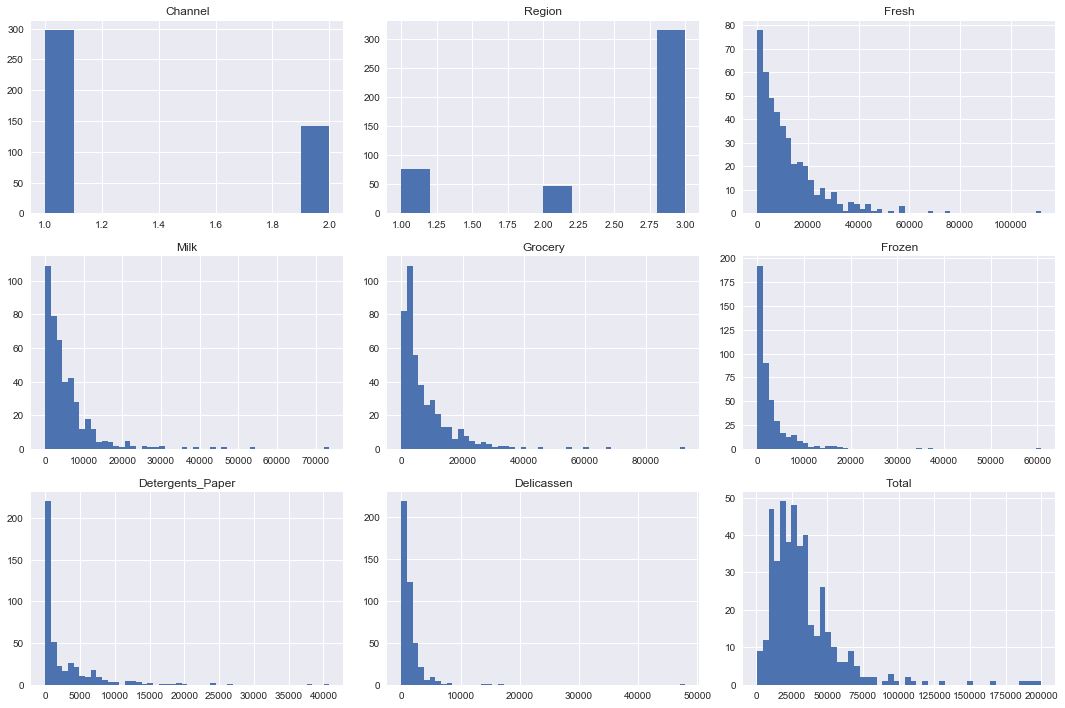

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.hist('Channel', data=data)
plt.title('Channel')
plt.subplot(3,3,2)
plt.hist('Region', data=data)
plt.title('Region')
plt.subplot(3,3,3)
plt.hist('Fresh', data=data, bins=50)
plt.title('Fresh')
plt.subplot(3,3,4)
plt.hist('Milk', data=data, bins=50)
plt.title('Milk')
plt.subplot(3,3,5)
plt.hist('Grocery', data=data, bins=50)
plt.title('Grocery')
plt.subplot(3,3,6)
plt.hist('Frozen', data=data, bins=50)
plt.title('Frozen')
plt.subplot(3,3,7)
plt.hist('Detergents_Paper', data=data, bins=50)
plt.title('Detergents_Paper')
plt.subplot(3,3,8)
plt.hist('Delicassen', data=data, bins=50)
plt.title('Delicassen')
plt.subplot(3,3,9)
plt.hist('Total', data=data, bins=50)
plt.title('Total')
plt.tight_layout()
plt.show()

***Using Seaborn, plot total amount in the two customer channels, to see if any difference between them:*** 

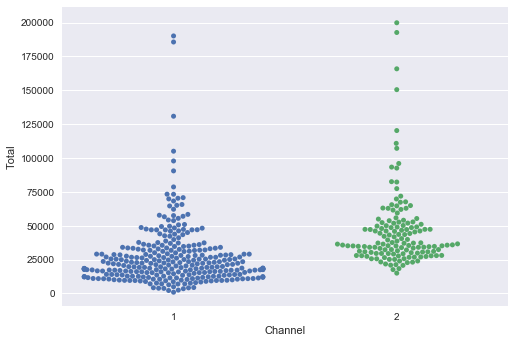

In [8]:
sns.swarmplot(x='Channel', y='Total', data=data)
plt.show()

***To get additional insight, add hue information about the Region:***

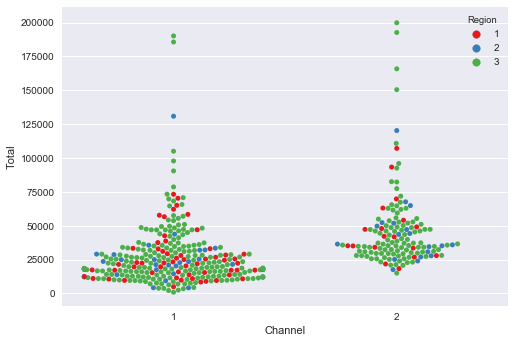

In [9]:
sns.swarmplot(x='Channel', y='Total', data=data, hue='Region', palette='Set1')
plt.show()

***This is not very useful to visualize distribution though, as most of the points belong to Region 3. So we try swapping Channel and Region:***

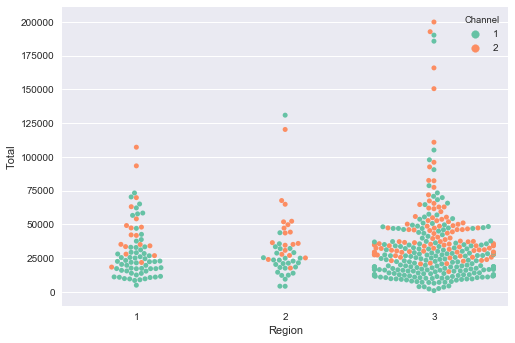

In [10]:
sns.swarmplot(x='Region', y='Total', data=data, hue='Channel', palette='Set2')
plt.show()

***This plot now shows a clear dependence upon the channel, and a not-so-clear dependence upon the region.
Other ways to visualize the purchases distribution as a function of Channel and Region is through function factorplot:***

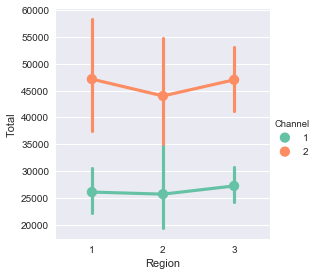

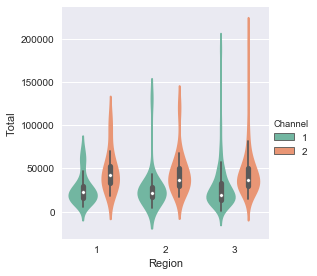

In [11]:
sns.factorplot(x='Region', y="Total", hue="Channel", data=data, palette='Set2')
plt.show()
sns.factorplot(x='Region', y="Total", hue="Channel", data=data, kind='violin', palette='Set2')
plt.show()

***The first plot in particular shows that differences between Channels 1 and 2 are statistically significant, while the differences between Regions 1,2,3 are not. Similar plots can be built also using the single purchase categories:***

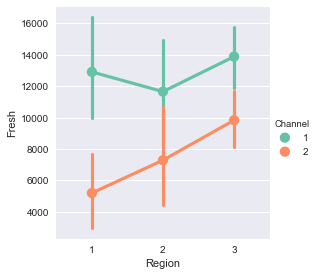

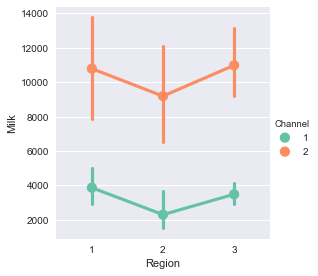

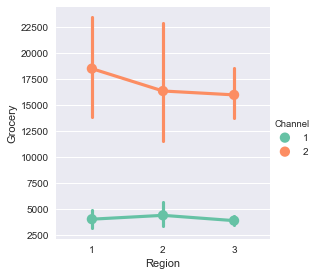

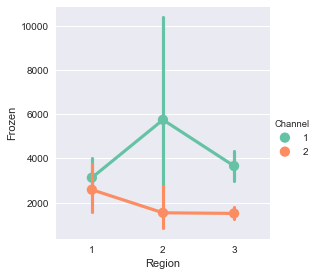

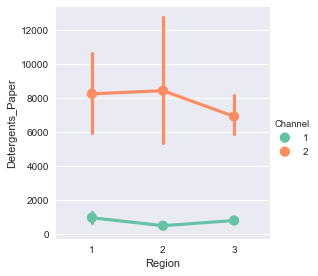

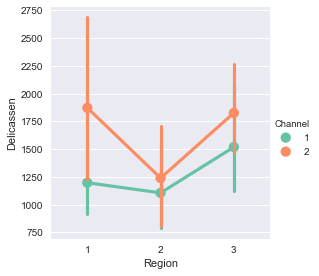

In [12]:
sns.factorplot(x='Region', y="Fresh", hue="Channel", data=data, palette='Set2')
plt.show()
sns.factorplot(x='Region', y="Milk", hue="Channel", data=data, palette='Set2')
plt.show()
sns.factorplot(x='Region', y="Grocery", hue="Channel", data=data, palette='Set2')
plt.show()
sns.factorplot(x='Region', y="Frozen", hue="Channel", data=data, palette='Set2')
plt.show()
sns.factorplot(x='Region', y="Detergents_Paper", hue="Channel", data=data, palette='Set2')
plt.show()
sns.factorplot(x='Region', y="Delicassen", hue="Channel", data=data, palette='Set2')
plt.show()

***The above plots show that dependence upon the Channel is very different for the different categories. Some categories are preferentially sold through a specific channel, other categories through an other channel, and for other categories the difference is not statistically significant.
The following plots look at relationship between pairs of categories:***

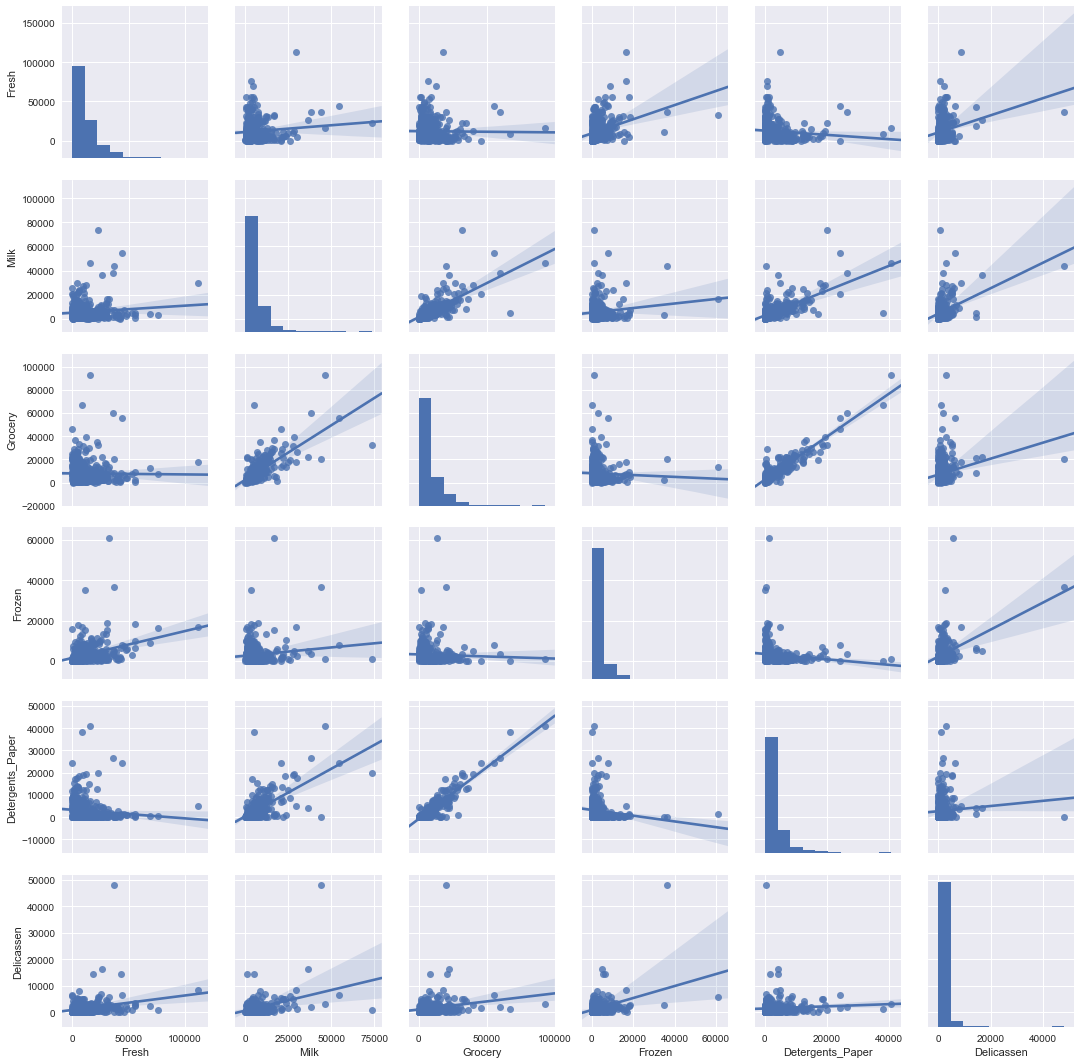

In [13]:
sns.pairplot(data=data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']], kind='reg')
plt.show()

***Most categories are positively correlated. The following heatmap plot looks at level of correlation between different categories:***

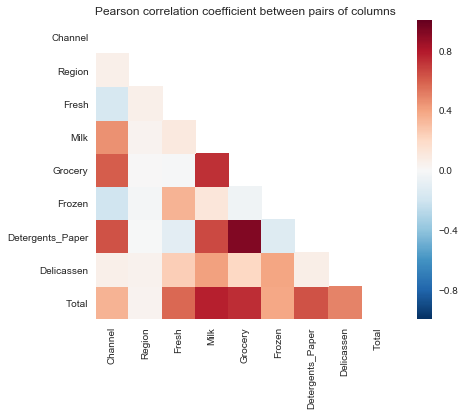

In [14]:
corr = data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)
plt.title('Pearson correlation coefficient between pairs of columns')
plt.show()

***We confirm that, as seen in the pairplots above, correlation between categories is generally positive, meaning that customers with higher purchases in one category are likely to have higher purchases in other categories too. We can see for example that 'Grocery' and 'Detergents-Paper' are highly correlated.***

## Customers segmentation (clustering) using kmeans algorithm

***Import modules needed for customers segmentation:***

In [15]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

***Convert pandas dataframe to numpy array and normalize each column:***

In [16]:
data_np = np.array(data)

dataNorm = np.zeros(data_np.shape)
for k in range(data_np.shape[1]): 
    dataNorm[:,k] = (data_np[:,k] - np.mean(data_np[:,k])) / np.std(data_np[:,k])

***Use the elbow method to determine the number of segments (categories) into which to group the customers:***

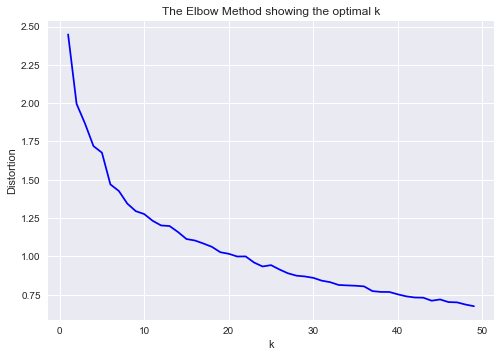

In [17]:
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dataNorm)
    kmeanModel.fit(dataNorm)
    distortions.append(sum(np.min(cdist(dataNorm, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dataNorm.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

***There is no clear elbow, as quite often the case when working with real data that do not contain a very specific structure. The number of segments that it is best to consider depends on the specific application (advertisement, targeted customer service, etc.). For our generic purposes 10 groups looks like a reasonable choice.***

***We train the model using our 440 examples, and predict categories for these customers***

In [18]:
kmeanModel = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
       precompute_distances='auto', verbose=0, random_state=None, copy_x=True,
       n_jobs=1, algorithm='auto')

kmeanModel.fit_predict(dataNorm, y=None)

labels = kmeanModel.labels_

***Visualize the 10 categories in the Fresh-Milk plane, as an example of the result of the segmentation:***

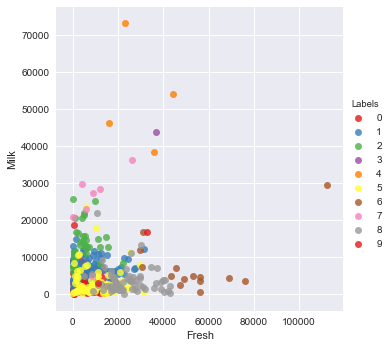

In [19]:
data['Labels'] = labels

sns.lmplot('Fresh','Milk',data=data, fit_reg=False, hue='Labels', palette='Set1')
plt.show()

***And if we zoom in the previous plot:***

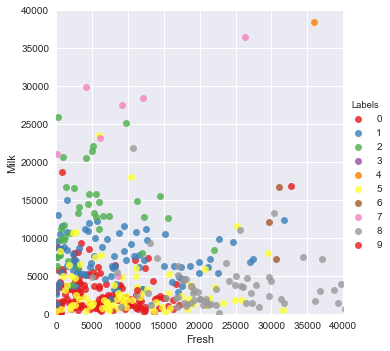

In [20]:
lm = sns.lmplot('Fresh','Milk', data=data, fit_reg=False, hue='Labels', sharex=False,sharey=False, palette='Set1')
axes = lm.axes
axes[0,0].set_ylim(0,40000)
axes[0,0].set_xlim(0,40000)
plt.show()

***Cluster 8, for instance, represents customers who had large purchases of fresh products and small purchses of milk. Cluster 1 has the opposite behaviour. From next plot, instead, we see that cluster 2 is characterized by small frozen purchases. ***

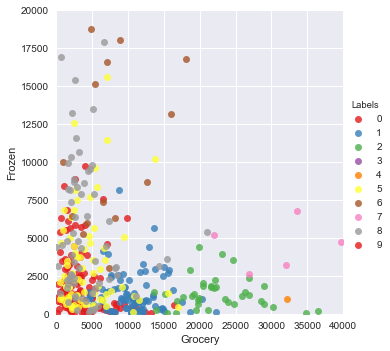

In [21]:
data['Labels'] = labels

lm = sns.lmplot('Grocery','Frozen',data=data, fit_reg=False, hue='Labels', sharex=False, sharey=False, palette='Set1')
axes = lm.axes
axes[0,0].set_ylim(0,20000)
axes[0,0].set_xlim(0,40000)
plt.show()